<a href="https://www.kaggle.com/code/rodolphojustino/exploratory-data-analysis-correlating-car-prices?scriptVersionId=118782507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

First of All, we need to load the libraries that we are using in the project

In [1]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
import sklearn as skl
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### Now, we load the dataset

In [2]:
url = "/kaggle/input/imports85data/imports-85.data"
df = pd.read_csv(url, header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### After loaded, we checked that there is, in fact, no header row. We need to add one

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df1 = df.replace("?",np.NaN)
df = df1
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### There are non-numeric values, NaN and ?, on the df, we need to treat that as a priority as the non-numeric values cited before can make our analysis harder

In [5]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

### Replacing the values in the columns

In [6]:
avg_norm_losses = df["normalized-losses"].astype("float").mean(axis = 0)
avg_bore = df["bore"].astype("float").mean(axis=0)
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
avg_hp = df["horsepower"].astype("float").mean(axis = 0)
avg_RPM = df["peak-rpm"].astype("float").mean(axis = 0)

df["normalized-losses"].replace(np.nan, avg_norm_losses, inplace = True)
df["bore"].replace(np.nan, avg_bore, inplace = True)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
df["horsepower"].replace(np.nan, avg_hp, inplace = True)
df["peak-rpm"].replace(np.nan, avg_RPM, inplace = True)

## Now, we need to decide what to do with the missing values, there are missing values in diffent types of columns, and we can do different things with them

### Delete the whole line: we only delete if the data is not used or does not have a usage in any case, in other way we can do the following

### Replace the missing values by:
  ###  - Mean: normalized-losses(41 values), Stroke(4 values), Bore(4 values), Horsepower (4 values), peak-rpm (2 values)

## Now, to make the replacement of values using the mode, we can:

In [7]:
df["num-of-doors"].value_counts()
df["num-of-doors"].value_counts().idxmax()

'four'

In [8]:
df["num-of-doors"].replace(np.nan, "four", inplace = True)

## Now, dropping any rows that dont have a price

In [9]:
df.dropna(subset = ["price"], axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True) #this row resets the list index

In [10]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Normalized losses, bore, stroke, hp, rpm, price need to be converted to float or int

In [11]:
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke", "price", "peak-rpm"]].astype("float")
df[["normalized-losses","horsepower"]] = df[["normalized-losses","horsepower"]].astype("int")
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### In order for some analysis to be carried out, we need to normalize some data, the length, width and height of the car can be normalized in order to be between zero and 1

In [12]:
df["length"] = df["length"]/df["length"].max()
df["height"] = df["height"]/df["height"].max()
df["width"] = df["width"]/df["width"].max()

df[["length", "width", "height"]]

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
196,0.907256,0.956944,0.928094
197,0.907256,0.955556,0.928094
198,0.907256,0.956944,0.928094
199,0.907256,0.956944,0.928094


### For a preliminary data check, we plot a histogram of the horsepower 

[Text(0, 0, '44'),
 Text(0, 0, '45'),
 Text(0, 0, '48'),
 Text(0, 0, '24'),
 Text(0, 0, '14'),
 Text(0, 0, '16'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

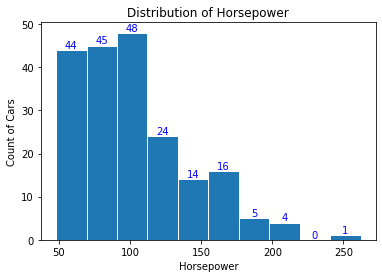

In [13]:
values, bins, bars = plt.hist(df["horsepower"], edgecolor='white')
#plt.hist(df["horsepower"])
plt.xlabel("Horsepower")
plt.ylabel("Count of Cars")
plt.title("Distribution of Horsepower")
plt.bar_label(bars, fontsize=10, color='blue')

### Then, we need to do data compartimentization, dividing the hp range in 3, in order to do that, we divide in 3 price ranges, needing 4 numbers

In [14]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]),4)
group_names = ["Low", "Medium", "High"]
df["horsepower-class"] = pd.cut(df["horsepower"], bins, labels = group_names, include_lowest = True)
df[["horsepower", "horsepower-class"]]

,horsepower,horsepower-class
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
...,...,...
196,114,Low
197,160,Medium
198,134,Medium
199,106,Low


### Now, plotting the distribution in each class

[Text(0, 0, '153'), Text(0, 0, '43'), Text(0, 0, '5')]

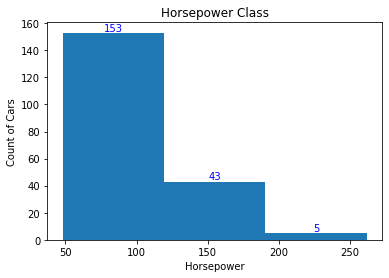

In [15]:
values, bins, bars = plt.hist(df["horsepower"], bins = 3)
plt.xlabel("Horsepower")
plt.ylabel("Count of Cars")
plt.title("Horsepower Class")
plt.bar_label(bars, fontsize=10, color='blue')

### Some data cannot be used to perform some calculations, as they are strings, for example, fuel types, so, we need to assign them as dummy variables

In [16]:
dummy_fuel = pd.get_dummies(df["fuel-type"])
dummy_fuel.rename(columns = {"gas": "fuel-type-gas", "diesel":"fuel-type-diesel"}, inplace = True)
df = pd.concat([df, dummy_fuel], axis = 1)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-class,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114,5400.0,23,28,16845.0,Low,0,1
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160,5300.0,19,25,19045.0,Medium,0,1
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134,5500.0,18,23,21485.0,Medium,0,1
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106,4800.0,26,27,22470.0,Low,1,0


### Now, we perform the same process on for the aspiration type

In [17]:
dummy_asp = pd.get_dummies(df["aspiration"])
dummy_asp.rename(columns = {"std": "std-aspiration", "turbo":"turbo-aspiration"}, inplace = True)
df = pd.concat([df, dummy_asp], axis = 1)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-class,fuel-type-diesel,fuel-type-gas,std-aspiration,turbo-aspiration
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,115,5500.0,18,22,17450.0,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,114,5400.0,23,28,16845.0,Low,0,1,1,0
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,160,5300.0,19,25,19045.0,Medium,0,1,0,1
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,134,5500.0,18,23,21485.0,Medium,0,1,1,0
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,106,4800.0,26,27,22470.0,Low,1,0,0,1


### An exploratory analysis that can be done is a boxplot of the horsepower class related to the price of the car, is there a correlation?

Text(0.5, 1.0, 'Boxplot of Horsepower class versus Price')

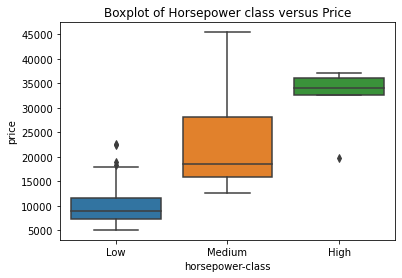

In [18]:
sns.boxplot(x = "horsepower-class", y = "price", data = df).set_title("Boxplot of Horsepower class versus Price")

### It can be seen that there is, in fact, a correlation of the horsepower class versus the price range of the car, we can explore further more with a scatter plot

Text(0, 0.5, 'Price')

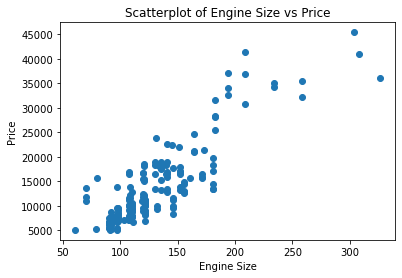

In [19]:
y = df["price"]
x = df["engine-size"]
plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

### Again, we can see the correlation between engine size vc price range

### We now test correlating different variables

(0.0, 53423.889179282625)

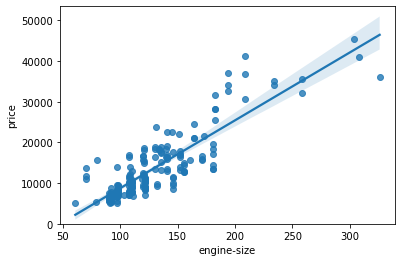

In [20]:
sns.regplot(x = "engine-size", y = "price", data = df)
plt.ylim(0,)

(0.0, 48173.63423946269)

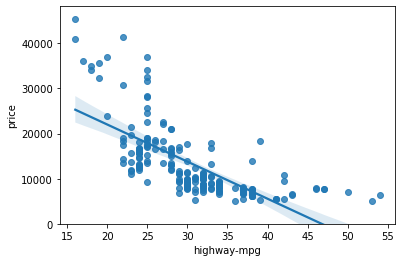

In [21]:
sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.ylim(0,)

(0.0, 47414.1)

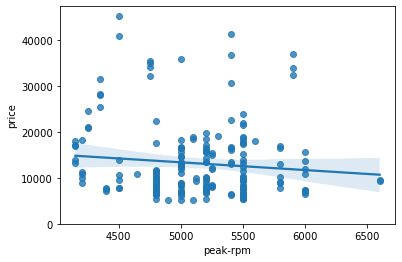

In [22]:
sns.regplot(x = "peak-rpm", y = "price", data = df)
plt.ylim(0,)

### We can check that there is no evident correlation between peak rpm and price

## Another way to check correlation between variables is to use the pearson correlation.

### It measures de correlation between two factores, a factor close to +1 means a strong positive correlation, a factor close to -1 means a strong negative correlation, values close to zero mean a lack of correlation

### values of P<0,001 mean a strong certainty of the result, P<0,05 moderate certainty, P<0,1 indicates a low level

### to check that we can use the calculations to check some correlations

In [23]:
pearson_coef, p_value = pearsonr(df["horsepower"], df["price"])
print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8096068016571054 with a P-value of P =  6.273536270650504e-48


## Creating a heatmap

<AxesSubplot:>

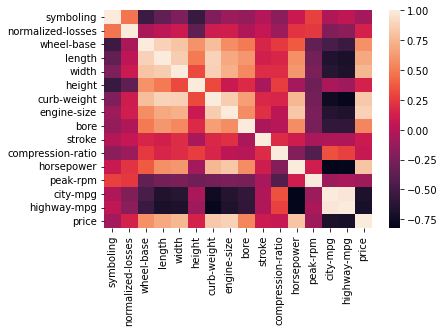

In [24]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
df_numeric = df.select_dtypes(include = numerics)
corr = df_numeric.corr()
sns.heatmap(corr)

## From the heatmap we can see some strong correlations, like:

- City mpg and price (strong negative correlation)
- highway mpg and price (Strong negative correlation)
- Engine size and price (Strong positive correlation)
- horsepower (positive correlation)

### Now, we can explore modeling and developing mathematical correlations

 first, checking a linear model for mpg and price

In [25]:
lm = linear_model.LinearRegression()
X = df[["highway-mpg"]]
Y = df["price"]
lm.fit(X,Y)
Yhat = lm.predict(X)

Yhat[0:5]

lm.intercept_
lm.coef_

print("The intercept is ", lm.intercept_, "the sope is ", lm.coef_)

The intercept is  38423.3058581574 the sope is  [-821.73337832]


## Now, we plot to see the data

(0.0, 48185.01100999397)

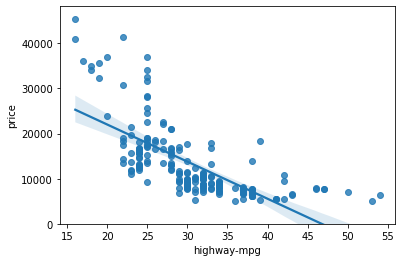

In [26]:
sns.regplot(x = "highway-mpg", y = "price", data = df )

plt.ylim(0,)

## Another way to see how data works in multi variable linear regression

The intercept is  -15811.863767729232  The slope is  [53.53022809  4.70805253 81.51280006 36.1593925 ]


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Proportion of Cars')

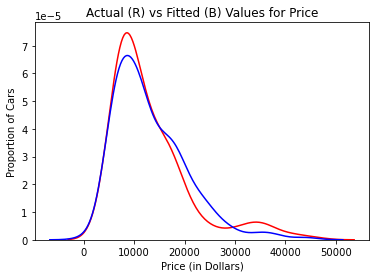

In [27]:
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
lm3 = linear_model.LinearRegression()
lm3.fit(Z, df["price"])
Yhat3 = lm3.predict(Z)
Yhat3[0:5]

lm3.intercept_
lm3.coef_

print("The intercept is ", lm3.intercept_, " The slope is ", lm3. coef_)

ax1 = sns.distplot(df["price"], hist = False, color = "r", label = "Actual Value")
sns.distplot(Yhat3, hist = False, color = "b", label = "Fitted Values", ax = ax1)

plt.title("Actual (R) vs Fitted (B) Values for Price")
plt.xlabel("Price (in Dollars)")
plt.ylabel("Proportion of Cars")

### Here, we can se that the parameters used give a good idea of how the model calculated compares to the actual model

### Now, testing polynomial regression

### we define a function that shows lines and scatterplots altogether

In [28]:
def PlotPolly (model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,60,100)
    y_new = model (x_new)
    
    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
    plt.title("Polynomial Fit with Matplotlib for price ~ lentgh")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898,))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    plt.show()

In [29]:
x = df["highway-mpg"]
y = df["price"]
#Using a 3rd order poly
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


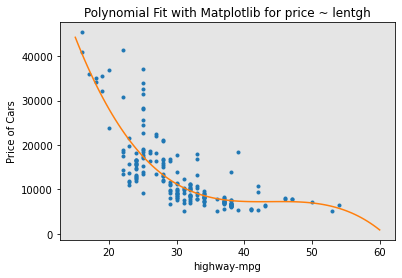

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [30]:
PlotPolly(p, x, y, "highway-mpg")
np.polyfit(x,y, 3)

## Model Evaluation and Refinement

In a fist moment, we use just the numeric data from the original df

In [31]:
df2 = df._get_numeric_data()
df2

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,std-aspiration,turbo-aspiration
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,13495.0,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,0.928094,2952,141,3.78,3.15,9.5,114,5400.0,23,28,16845.0,0,1,1,0
197,-1,95,109.1,0.907256,0.955556,0.928094,3049,141,3.78,3.15,8.7,160,5300.0,19,25,19045.0,0,1,0,1
198,-1,95,109.1,0.907256,0.956944,0.928094,3012,173,3.58,2.87,8.8,134,5500.0,18,23,21485.0,0,1,1,0
199,-1,95,109.1,0.907256,0.956944,0.928094,3217,145,3.01,3.40,23.0,106,4800.0,26,27,22470.0,1,0,0,1


Creating a function for the plot

In [32]:
def DistributionPlot (RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height= 10
    plt.figure(figsize = (width, height))
    
    ax1 = sns.distplot(RedFunction, hist = False, color = "r", label = RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color = "b", label = BlueName, ax = ax1)
    
    plt.title(Title)
    plt.xlabel("Price (Dollars)")
    plt.ylabel ("Proportion of Cars")
    plt.legend()
    
    plt.show()
    plt.close()

In [33]:
def PolyPlot (xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure (figsize = (width, height))
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, "ro", label = "Training Data")
    plt.plot(xtest, y_test, "go", label = "Testing Data")
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label = "Predicted Function" )
    #plt.xlim([0, 250])
    plt.ylabel("Price")
    plt.legend()

Now that the plot functions are defined, its time to train and test

In [34]:
y_data = df["price"]
x_data = df.drop("price", axis = 1)

Now, Randomly, we split the data set into training data and testing data, using *train_test_split*

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 1 )
print("number of test samples: ", x_test.shape[0])
print("number of training samples: ", x_train.shape[0])

number of test samples:  21
number of training samples:  180


Now, to test the difference of the split in the model regression, we can perform a test, we generate a model with both the test and train data and compare them

In [36]:
lre = LinearRegression()
lre.fit(x_train[["horsepower"]], y_train)
r2_test = lre.score(x_test[["horsepower"]], y_test)
r2_train = lre.score(x_train[["horsepower"]], y_train)

print("the score with the test data is ", r2_test)
print("the score with the train data is ", r2_train)

the score with the test data is  0.3635480624962413
the score with the train data is  0.662028747521533


We can see the difference between the usage of both datasets, as the train data has more points, the model is more robust, therefore, its score (r2) is higher than the test data, wich, as we defined before, has 10% of the total data

When there's not enough data, we can use cross validation, giving an input, and a parameter wich determines the number of folds in the data and validates them with each other

In [37]:
Rcross = cross_val_score(lre, x_data[["horsepower"]], y_data, cv = 4)
print("The R2 of the folds are ", Rcross)
print("The mean of the folds are ", Rcross.mean(), "and the std dev is ", Rcross.std())

The R2 of the folds are  [0.77465419 0.51718424 0.74814454 0.04825398]
The mean of the folds are  0.5220592359225414 and the std dev is  0.29130480666118436


## Overfitting, Underfitting and Model Selection

To test this concepts, we first use multiple parameters as atributes to train the model

In [38]:
lr2 = LinearRegression()
lr2.fit(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_train)

LinearRegression()

In [39]:
yhat_train = lr2.predict(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
yhat_train[0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])

In [40]:
yhat_test = lr2.predict(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
yhat_test[0:5]

array([11349.68099115,  5884.25292475, 11208.31007475,  6641.03017109,
       15565.98722248])

## Underfitting

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


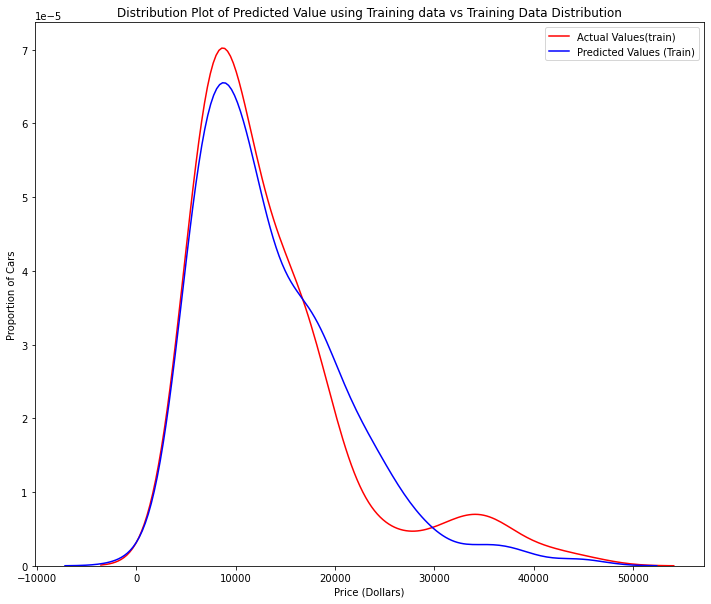

In [41]:
Title = "Distribution Plot of Predicted Value using Training data vs Training Data Distribution"
DistributionPlot(y_train, yhat_train, "Actual Values(train)", "Predicted Values (Train)", Title)

## Now, performing the same operation for the test data

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


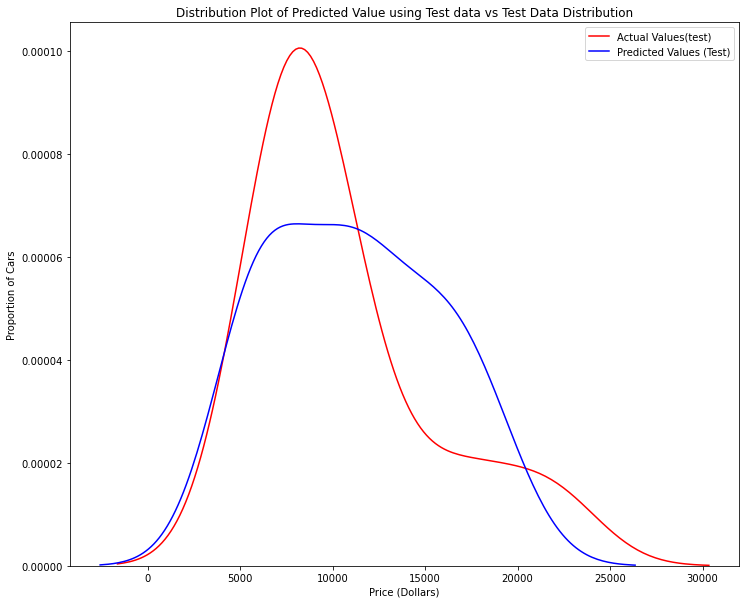

In [42]:
Title = "Distribution Plot of Predicted Value using Test data vs Test Data Distribution"
DistributionPlot(y_test, yhat_test, "Actual Values(test)", "Predicted Values (Test)", Title)

We see clearly the difference in the dataset size and its impacts on the analysis

## Overfitting

overfitting happens when the model fits the noise and the errors in the data, but not the process itself

In [43]:
x_train,x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)

Performing a 5th degree polynomial regression to show how overfitting works

In [44]:
pr = PolynomialFeatures (degree = 5)
x_train_pr = pr.fit_transform(x_train[["horsepower"]])
x_test_pr = pr.fit_transform(x_test[["horsepower"]])
pr

PolynomialFeatures(degree=5)

In [45]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [46]:
yhat7 = poly.predict(x_test_pr)
yhat7[0:5]

array([ 6727.58219945,  7306.70943225, 12213.70783901, 18895.03307984,
       19996.8349332 ])

In [47]:
print("Predicted Values: ", yhat7[0:5])
print("Actual Values: ", y_test[0:5])

Predicted Values:  [ 6727.58219945  7306.70943225 12213.70783901 18895.03307984
 19996.8349332 ]
Actual Values:  18      6295.0
170    10698.0
107    13860.0
98     13499.0
177    15750.0
Name: price, dtype: float64


Using PollyPlot to show data and the function

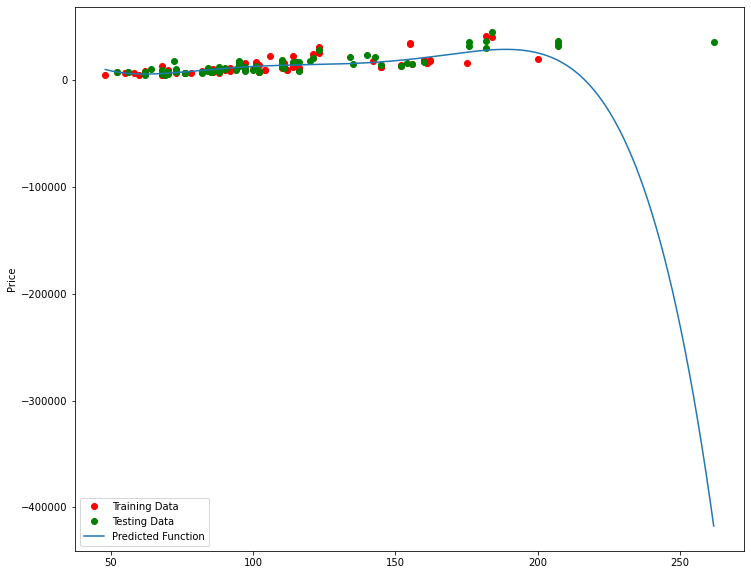

In [48]:
PolyPlot(x_train[["horsepower"]], x_test[["horsepower"]], y_train, y_test, poly, pr)

## As there are no negative prices, the model overfits, it takes the noise and erros from the dataset , and this particular model would not work for further analysis

another way to check overfitting is with the R score, usually a negative value of R2 indicates overfitting

In [49]:
pr1 = poly.score(x_train_pr, y_train)
pr2 = poly.score(x_test_pr, y_test)

print("R2 for the training data: " , pr1)
print("R2 for the test data", pr2)

R2 for the training data:  0.5568527853920224
R2 for the test data -29.815556299616322


## Checking how R2 changes with a change in polynomial order for a specific parameter

Text(3, 0.75, 'Maximum R2')

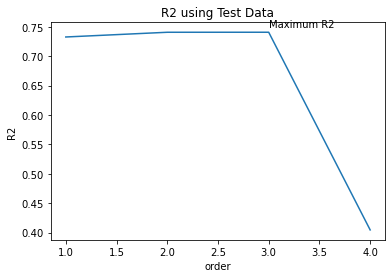

In [50]:
Rsqu_test = []
lr = LinearRegression()
order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr. fit_transform(x_train[["horsepower"]])
    x_test_pr = pr.fit_transform(x_test[["horsepower"]])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel("order")
plt.ylabel("R2")
plt.title("R2 using Test Data")
plt.text(3, 0.75, "Maximum R2")

In the graph above we can see some insight on the equation order which would give out the maximum value of R2 for the regression we performed

## Creating an Interface so we can interact and see different insights for polynomial regression

In [51]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_data, random_state = 0)
    pr = PolynomialFeatures (degree = order)
    x_train_pr = pr.fit_transform(x_train[["highway-mpg"]])
    x_test_pr = pr.fit_transform(x_test[["highway-mpg"]])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PolyPlot(x_train[["highway-mpg"]], x_test[["highway-mpg"]], y_train, y_test, poly, pr)

In [52]:
interact(f, order = (0,6,1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>